In [16]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools
import statsmodels.api as sm


In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Importing the csv file
data = pd.read_csv('ITSM_data.csv')

In [104]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,2/12/2013 12:31,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [19]:
data.shape

(46606, 25)

In [20]:
data['Open_Time'].isnull().sum()

0

In [21]:
# Imporing the necessary columns
incfrq = data.loc[:,['Incident_ID','Open_Time']]

In [22]:
incfrq

,Incident_ID,Open_Time
0,IM0000004,5/2/2012 13:32
1,IM0000005,12/3/2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10/8/2012 11:01
...,...,...
46601,IM0047053,31-03-2014 16:23
46602,IM0047054,31-03-2014 15:03
46603,IM0047055,31-03-2014 15:28
46604,IM0047056,31-03-2014 15:35


In [23]:
incfrq.head()

,Incident_ID,Open_Time
0,IM0000004,5/2/2012 13:32
1,IM0000005,12/3/2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10/8/2012 11:01


In [24]:
incfrq.shape

(46606, 2)

In [25]:
# Coverting all the values in proper Datetime format
for i in range(len(incfrq.Open_Time)):
    if (incfrq.Open_Time[i][1]=='/'):
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d/%m/%Y %H:%M').date()
    elif (incfrq.Open_Time[i][2]=='/'):
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d/%m/%Y %H:%M').date()
    else:
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d-%m-%Y %H:%M').date()

In [26]:
incfrq.head()

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10


In [27]:
incfrq.columns


Index(['Incident_ID', 'Open_Time'], dtype='object')

In [28]:
# Adding a new column which will have the number of tickets per day
incfrq['No_Incidents'] = incfrq.groupby('Open_Time')['Incident_ID'].transform('count')


In [29]:
incfrq.drop(['Incident_ID'],axis=1,inplace=True)
incfrq.drop_duplicates(inplace=True)

In [30]:
incfrq.head(3)

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1


In [31]:
incfrq.columns

Index(['Open_Time', 'No_Incidents'], dtype='object')

In [32]:
# Setting Date as the Index
incfrq = incfrq.set_index('Open_Time')
incfrq.index = pd.to_datetime(incfrq.index)
incfrq.index

DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [33]:
incfrq.head()

,No_Incidents
Open_Time,
2012-02-05,1
2012-03-12,1
2012-03-29,1
2012-07-17,1
2012-08-10,2


In [34]:
# Checking range of dates for our values
print(incfrq.index.min(),'to',incfrq.index.max())

2012-02-05 00:00:00 to 2014-03-31 00:00:00


In [35]:
# Making a new Series with frequency as Day
data1 = incfrq['No_Incidents']
data1 = data1.asfreq('D')
data1.index

DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

In [36]:
data1.head(10)

Open_Time
2012-02-05    1.0
2012-02-06    NaN
2012-02-07    NaN
2012-02-08    NaN
2012-02-09    NaN
2012-02-10    NaN
2012-02-11    NaN
2012-02-12    NaN
2012-02-13    NaN
2012-02-14    NaN
Freq: D, Name: No_Incidents, dtype: float64

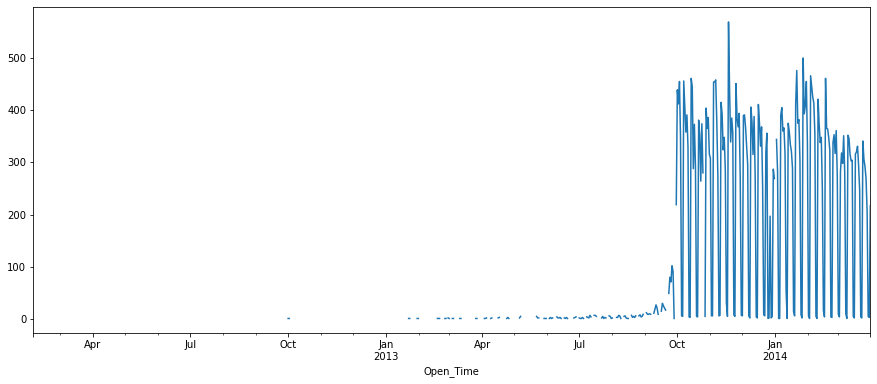

In [37]:
# Plotting number of tickets per day
data1.plot(figsize=(15,6))
plt.show()

In [38]:
# Since not many tickets before October 2013, we consider only the latter values
incfrom2013_new = incfrq[incfrq.index > dt.datetime(2013,10,1)]

In [39]:
incfrom2013_new['No_Incidents']

Open_Time
2013-10-02    412
2013-10-03    455
2013-10-04    345
2013-10-07    456
2013-10-05      6
             ... 
2014-03-27    269
2014-03-28    205
2014-03-29      5
2014-03-30      3
2014-03-31    217
Name: No_Incidents, Length: 179, dtype: int64

In [40]:
# new Series
data2 = pd.DataFrame(incfrom2013_new['No_Incidents'])
data2 = data2.asfreq('D')
data2.index

DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

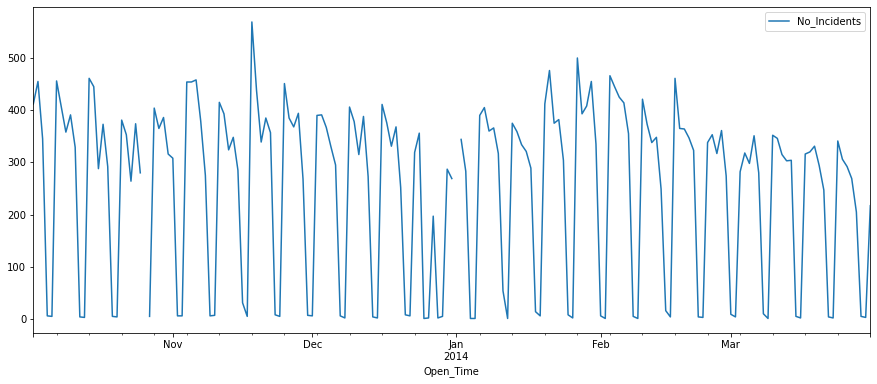

In [41]:
# Plotting number of tickets per day after October 2013
data2.plot(figsize=(15,6))
plt.show()

In [42]:
data2.index

DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

In [55]:
data2.dtypes

No_Incidents    float64
dtype: object

In [59]:
data2.isnull().sum()

No_Incidents    2
dtype: int64

In [66]:
new_data2=data2.dropna()


In [67]:
new_data2

,No_Incidents
Open_Time,
2013-10-02,412.0
2013-10-03,455.0
2013-10-04,345.0
2013-10-05,6.0
2013-10-06,5.0
...,...
2014-03-27,269.0
2014-03-28,205.0
2014-03-29,5.0


In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

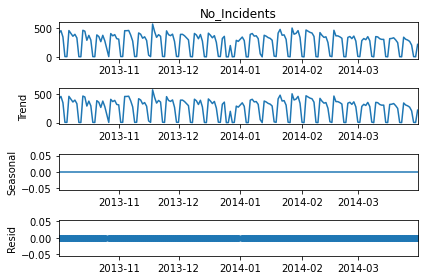

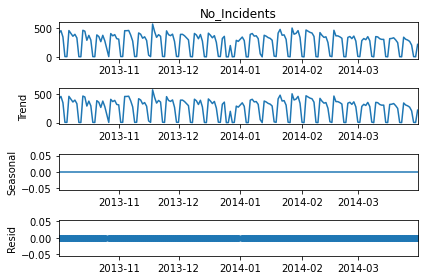

In [72]:
results = seasonal_decompose(x=new_data2['No_Incidents'], model='additive', extrapolate_trend='freq', period=1)
results.plot()

In [73]:

### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller


In [74]:
ad_result=adfuller(new_data2['No_Incidents'])

In [75]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(new_data2):
    ad_result=adfuller(new_data2)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(ad_result,labels):
        print(label+' : '+str(value) )
    if ad_result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [76]:
adfuller_test(new_data2['No_Incidents'])

ADF Test Statistic : -2.188829101651175
p-value : 0.21032480191301778
#Lags Used : 14
Number of Observations Used : 164
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [77]:
new_data2['Sales First Difference'] = new_data2['No_Incidents'] - new_data2['No_Incidents'].shift(1)

In [78]:
new_data2['No_Incidents'].shift(1)

Open_Time
2013-10-02      NaN
2013-10-03    412.0
2013-10-04    455.0
2013-10-05    345.0
2013-10-06      6.0
              ...  
2014-03-27    292.0
2014-03-28    269.0
2014-03-29    205.0
2014-03-30      5.0
2014-03-31      3.0
Name: No_Incidents, Length: 179, dtype: float64

In [93]:
new_data2['Seasonal First Difference']=new_data2['No_Incidents'] - new_data2['No_Incidents'].shift(3)

In [94]:
new_data2.head()

,No_Incidents,Sales First Difference,Seasonal First Difference
Open_Time,,,
2013-10-02,412.0,NaN,NaN
2013-10-03,455.0,43.0,NaN
2013-10-04,345.0,-110.0,NaN
2013-10-05,6.0,-339.0,-406.0
2013-10-06,5.0,-1.0,-450.0


In [95]:
## Again test dickey fuller test
adfuller_test(new_data2['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.603937138095698
p-value : 0.00012702841274538404
#Lags Used : 13
Number of Observations Used : 162
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Open_Time'>

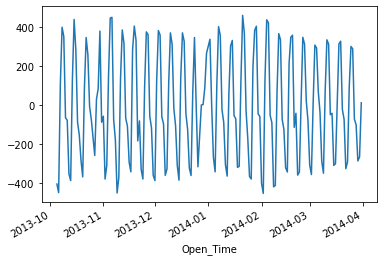

In [96]:
new_data2['Seasonal First Difference'].plot()

In [97]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

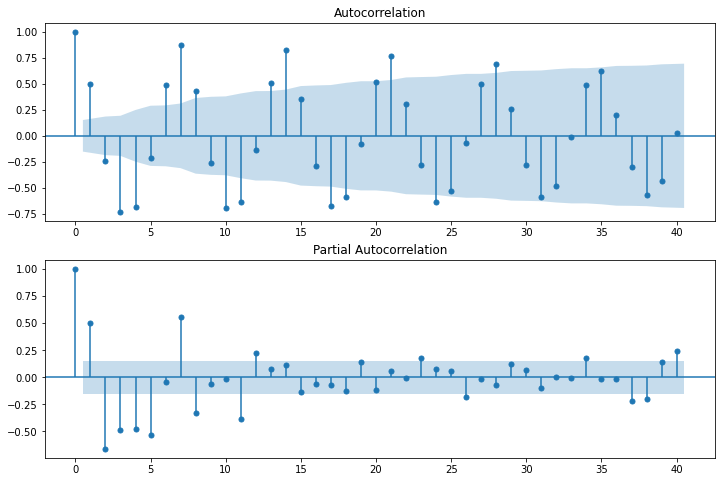

In [98]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(new_data2['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_data2['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [99]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [100]:
model=ARIMA(new_data2['No_Incidents'],order=(1,1,1))
model_fit=model.fit()

In [101]:

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.No_Incidents   No. Observations:                  178
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1156.354
Method:                       css-mle   S.D. of innovations            158.349
Date:                Sun, 26 Sep 2021   AIC                           2320.709
Time:                        19:00:48   BIC                           2333.436
Sample:                             1   HQIC                          2325.870
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.3501      0.339     -1.031      0.302      -1.015       0.315
ar.L1.D.No_Incidents     0.3308      0.071      4.648      0.000       0.191       0.470
ma.L1.D.No_Incidents    -1.0000      0.015    -67.811      0.000      -1.029      -0.971
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.0234           +0.0000j            3.0234            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [102]:
# Making a list of values for p,d & q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [103]:
# Checking the AIC values per pairs
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(new_data2,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))
    

ValueError: SARIMAX models require univariate `endog`. Got shape (179, 3).